# Retail Case Study

#### Business Problem:

   A Retail store is required to analyze the day-to-day transactions and keep a track of its customers 
spread across various locations along with their purchases/returns across various categories. 
Create a report and display the below calculated metrics, reports and inferences.
1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
    keep all customers who have done transactions with us and select the join type accordingly.
2. Prepare a summary report for the merged data set.
  a). Get the column names and their corresponding data types
  b). Top/Bottom 10 observations
  c). “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
  d). Frequency tables for all the categorical variables
3. Generate histograms for all continuous variables and frequency bars for categorical variables.
4. Calculate the following information using the merged dataset :
  a). Time period of the available transaction data
  b). Count of transactions where the total amount of transaction was negative
5. Analyze which product categories are more popular among females vs male customers.
6. Which City code has the maximum customers and what was the percentage of customers from 
    that city?
7. Which store type sells the maximum products by value and by quantity?
8. What was the total amount earned from the "Electronics" and "Clothing" categories from 
    Flagship Stores?
9. What was the total amount earned from "Male" customers under the "Electronics" category?
10. How many customers have more than 10 unique transactions, after removing all transactions 
    which have any negative amounts?
11. For all customers aged between 25 - 35, find out:
  a). What was the total amount spent for “Electronics” and “Books” product categories?
  b). What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
     
#### Given Data:

1. Customer information (customer.csv)
2. Product Information (prod_cat_info.csv)
3. Transactions occured (Transactions.csv)

#### Utilising the given data the following report is made to answer business questions

##### Importing necessary packages for the report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
file_path = 'E:/zoho/AnalytixLabs Notes - downloads/Case Studies/Python Case Study 1 Retail Case Study/'

##### Getting Information

In [3]:
cust = pd.read_csv(file_path + 'Customer.csv', delimiter = ',')
prod = pd.read_csv(file_path + 'prod_cat_info.csv', delimiter = ',')
transact = pd.read_csv(file_path + 'Transactions.csv', delimiter = ',')

##### Cleaning data for analysis

In [4]:
cust.DOB = pd.to_datetime(cust.DOB, format = '%d-%m-%Y')
prod.rename(columns = {'prod_cat_code' : 'prod_catcode_P'}, inplace = True)
transact.tran_date = transact.tran_date.str.replace('/', '-', regex = False)
transact.tran_date = pd.to_datetime(transact.tran_date, format = '%d-%m-%Y')
print(cust.info())
print(prod.info())
print(transact.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_catcode_P     23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 t

##### Merging Data for Analysis

In [5]:
# Q1) Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final
Customer_Final = cust.merge(transact, how = 'left' , left_on = 'customer_Id', right_on = 'cust_id' ).merge(prod, how = 'left', left_on =['prod_subcat_code','prod_cat_code'], right_on =['prod_sub_cat_code','prod_catcode_P'])
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_catcode_P,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,5.0,Books,7.0,Fiction
1,268408,1970-01-02,M,4.0,1.619787e+10,268408.0,2013-12-16,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,4.0,Bags,1.0,Mens
2,268408,1970-01-02,M,4.0,1.619787e+10,268408.0,2013-12-12,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,4.0,Bags,1.0,Mens
3,268408,1970-01-02,M,4.0,2.881014e+10,268408.0,2013-09-02,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,6.0,Home and kitchen,10.0,Kitchen
4,268408,1970-01-02,M,4.0,6.463344e+10,268408.0,2013-05-06,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,2.0,Footwear,4.0,Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23189,269626,1992-12-27,F,5.0,7.136903e+10,269626.0,2011-10-18,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,6.0,Home and kitchen,12.0,Tools
23190,269626,1992-12-27,F,5.0,9.413405e+10,269626.0,2011-07-07,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,1.0,Clothing,3.0,Kids
23191,274308,1992-12-29,F,5.0,2.620869e+10,274308.0,2012-10-22,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,2.0,Footwear,1.0,Mens
23192,274308,1992-12-29,F,5.0,5.735882e+10,274308.0,2012-09-05,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,2.0,Footwear,1.0,Mens


##### Quick Summary of Data Table

In [6]:
# Q2) a Column Names and their corresponding Data Types
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23194 entries, 0 to 23193
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        23194 non-null  int64         
 1   DOB                23194 non-null  datetime64[ns]
 2   Gender             23185 non-null  object        
 3   city_code          23186 non-null  float64       
 4   transaction_id     23053 non-null  float64       
 5   cust_id            23053 non-null  float64       
 6   tran_date          23053 non-null  datetime64[ns]
 7   prod_subcat_code   23053 non-null  float64       
 8   prod_cat_code      23053 non-null  float64       
 9   Qty                23053 non-null  float64       
 10  Rate               23053 non-null  float64       
 11  Tax                23053 non-null  float64       
 12  total_amt          23053 non-null  float64       
 13  Store_type         23053 non-null  object        
 14  prod_c

In [7]:
# removing observations where no transaction has happened 
Customer_Final.dropna(axis = 0, how = 'all', subset = ['transaction_id', 'cust_id','tran_date', 'Qty','Rate','Tax','total_amt'],
                         inplace = True)
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23193
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        23053 non-null  int64         
 1   DOB                23053 non-null  datetime64[ns]
 2   Gender             23044 non-null  object        
 3   city_code          23045 non-null  float64       
 4   transaction_id     23053 non-null  float64       
 5   cust_id            23053 non-null  float64       
 6   tran_date          23053 non-null  datetime64[ns]
 7   prod_subcat_code   23053 non-null  float64       
 8   prod_cat_code      23053 non-null  float64       
 9   Qty                23053 non-null  float64       
 10  Rate               23053 non-null  float64       
 11  Tax                23053 non-null  float64       
 12  total_amt          23053 non-null  float64       
 13  Store_type         23053 non-null  object        
 14  prod_c

In [8]:
# Q2) b Top/Bottom 10 Observations
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_catcode_P,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-01-02,M,4.0,8.724384e+10,268408.0,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,5.0,Books,7.0,Fiction
1,268408,1970-01-02,M,4.0,1.619787e+10,268408.0,2013-12-16,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,4.0,Bags,1.0,Mens
2,268408,1970-01-02,M,4.0,1.619787e+10,268408.0,2013-12-12,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,4.0,Bags,1.0,Mens
3,268408,1970-01-02,M,4.0,2.881014e+10,268408.0,2013-09-02,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,6.0,Home and kitchen,10.0,Kitchen
4,268408,1970-01-02,M,4.0,6.463344e+10,268408.0,2013-05-06,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,2.0,Footwear,4.0,Kids
5,268408,1970-01-02,M,4.0,5.690286e+10,268408.0,2013-01-30,9.0,3.0,5.0,868.0,455.700,4795.700,e-Shop,3.0,Electronics,9.0,Cameras
6,268408,1970-01-02,M,4.0,5.684453e+10,268408.0,2012-10-14,1.0,2.0,5.0,1175.0,616.875,6491.875,MBR,2.0,Footwear,1.0,Mens
7,268408,1970-01-02,M,4.0,1.951606e+10,268408.0,2012-09-07,10.0,3.0,4.0,650.0,273.000,2873.000,e-Shop,3.0,Electronics,10.0,Audio and video
8,268408,1970-01-02,M,4.0,1.264450e+10,268408.0,2012-08-14,4.0,4.0,3.0,321.0,101.115,1064.115,TeleShop,4.0,Bags,4.0,Women
9,268408,1970-01-02,M,4.0,6.331455e+10,268408.0,2012-04-26,1.0,1.0,1.0,806.0,84.630,890.630,Flagship store,1.0,Clothing,1.0,Women


In [9]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_catcode_P,prod_cat,prod_sub_cat_code,prod_subcat
23184,270476,1992-12-25,F,3.0,7.803441e+10,270476.0,2013-08-13,11.0,6.0,1.0,971.0,101.955,1072.955,TeleShop,6.0,Home and kitchen,11.0,Bath
23185,270476,1992-12-25,F,3.0,3.359888e+09,270476.0,2013-03-16,10.0,3.0,4.0,361.0,151.620,1595.620,MBR,3.0,Electronics,10.0,Audio and video
23186,270476,1992-12-25,F,3.0,2.288339e+10,270476.0,2012-05-22,4.0,2.0,4.0,898.0,377.160,3969.160,Flagship store,2.0,Footwear,4.0,Kids
23187,270476,1992-12-25,F,3.0,1.972519e+10,270476.0,2012-02-21,4.0,4.0,4.0,618.0,259.560,2731.560,e-Shop,4.0,Bags,4.0,Women
23188,270476,1992-12-25,F,3.0,8.547516e+10,270476.0,2011-08-09,5.0,3.0,5.0,1354.0,710.850,7480.850,Flagship store,3.0,Electronics,5.0,Computers
23189,269626,1992-12-27,F,5.0,7.136903e+10,269626.0,2011-10-18,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,6.0,Home and kitchen,12.0,Tools
23190,269626,1992-12-27,F,5.0,9.413405e+10,269626.0,2011-07-07,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,1.0,Clothing,3.0,Kids
23191,274308,1992-12-29,F,5.0,2.620869e+10,274308.0,2012-10-22,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,2.0,Footwear,1.0,Mens
23192,274308,1992-12-29,F,5.0,5.735882e+10,274308.0,2012-09-05,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,2.0,Footwear,1.0,Mens
23193,274308,1992-12-29,F,5.0,5.816054e+10,274308.0,2012-07-04,12.0,5.0,5.0,588.0,308.700,3248.700,e-Shop,5.0,Books,12.0,Academic


In [10]:
# Q2) c 'Five number Summary' for continous variables (min, Q1, median, Q3, max)

Customer_Final.loc[:,['Qty', 'Rate', 'Tax', 'total_amt']].quantile(q = [0, 0.25, 0.5, 0.75, 1])

,Qty,Rate,Tax,total_amt
0.00,-5.0,-1499.0,7.350,-8270.925
0.25,1.0,312.0,98.280,762.450
0.50,3.0,710.0,199.080,1754.740
0.75,4.0,1109.0,365.715,3569.150
1.00,5.0,1500.0,787.500,8287.500


In [11]:
# Q2) d Frequency tables for all Categorical Variables

Customer_Final['city_code'] = Customer_Final.city_code.astype(str)
Customer_Final['prod_cat_code'] = Customer_Final.prod_cat_code.astype(str)
Customer_Final['prod_catcode_P'] = Customer_Final.prod_catcode_P.astype(str)
Customer_Final['prod_subcat_code'] = Customer_Final.prod_subcat_code.astype(str)
Customer_Final['prod_sub_cat_code'] = Customer_Final.prod_sub_cat_code.astype(str)
Customer_Final['Store_type'] = Customer_Final.Store_type.astype(str)

Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23193
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_Id        23053 non-null  int64         
 1   DOB                23053 non-null  datetime64[ns]
 2   Gender             23044 non-null  object        
 3   city_code          23053 non-null  object        
 4   transaction_id     23053 non-null  float64       
 5   cust_id            23053 non-null  float64       
 6   tran_date          23053 non-null  datetime64[ns]
 7   prod_subcat_code   23053 non-null  object        
 8   prod_cat_code      23053 non-null  object        
 9   Qty                23053 non-null  float64       
 10  Rate               23053 non-null  float64       
 11  Tax                23053 non-null  float64       
 12  total_amt          23053 non-null  float64       
 13  Store_type         23053 non-null  object        
 14  prod_c

In [12]:
Customer_Final.describe(include = 'object')

,Gender,city_code,prod_subcat_code,prod_cat_code,Store_type,prod_catcode_P,prod_cat,prod_sub_cat_code,prod_subcat
count,23044,23053,23053,23053,23053,23053,23053,23053,23053
unique,2,11,12,6,4,6,6,12,18
top,M,4.0,4.0,5.0,e-Shop,5.0,Books,4.0,Women
freq,11811,2422,4002,6069,9311,6069,6069,4002,3048


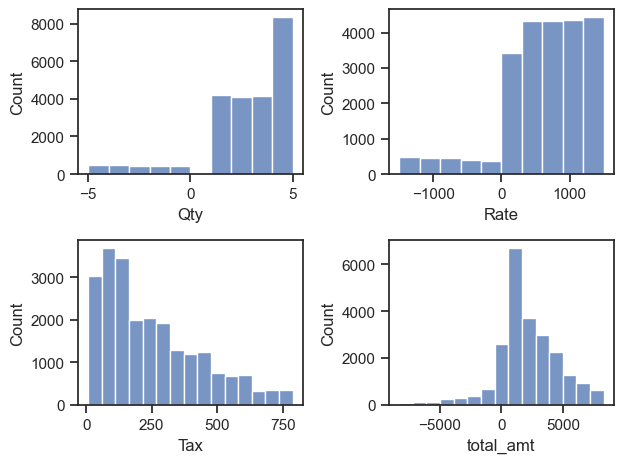

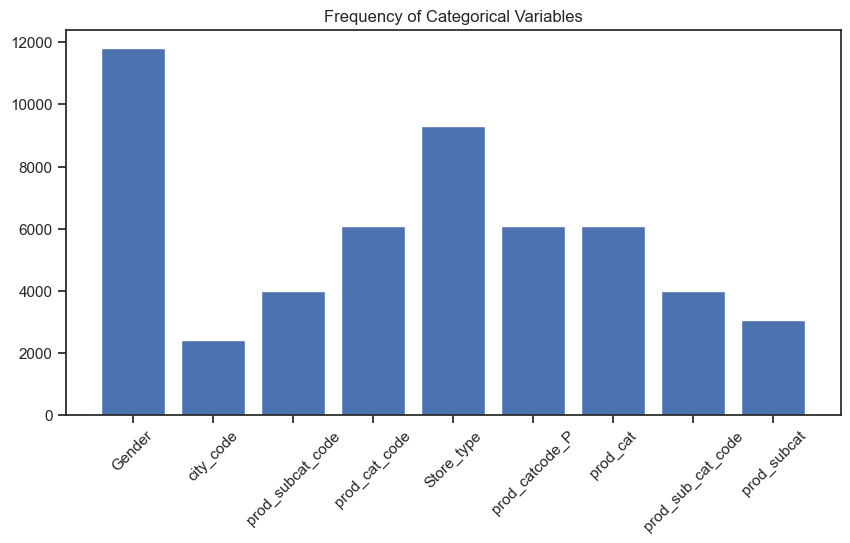

In [13]:
# Q3) Histograms for continuous variables and Frequency bars for categorical variables.

# continuous variables = 'Qty', 'Rate', 'Tax', 'total_amt'
# categorical variables = 'Gender', 'city_code', 'prod_subcat_code', 'prod_cat_code', 'prod_cat', 'prod_subcat', 'Store_type'

# Histograms :-

plt.subplot(2,2,1)
sns.histplot(data = Customer_Final.Qty, bins = 10)

plt.subplot(2,2,2)
sns.histplot(data = Customer_Final.Rate, bins = 10)

plt.subplot(2,2,3)
sns.histplot(data = Customer_Final.Tax, bins = 15)

plt.subplot(2,2,4)
sns.histplot(data = Customer_Final.total_amt, bins = 15)

plt.tight_layout()
plt.show()

# Frequency bars :-

freq_tab = Customer_Final.describe(include = 'object').T

plt.figure(figsize = (10,5))
plt.bar(x = freq_tab.index, height = freq_tab.freq)
plt.title('Frequency of Categorical Variables')
plt.xticks(rotation = 45)
plt.show()

In [14]:
# Q4) a Time Period of the avilable transaction data

Customer_Final.sort_values(by = 'tran_date', ascending = True, inplace = True)

#getting recent transaction date and first transaction date:

rec_date = Customer_Final.tran_date.iloc[-1]
fst_date = Customer_Final.tran_date.iloc[0]
print('Time period of available data is from :', fst_date.day_name(), ',', fst_date.day, 'th -', fst_date.month_name(), '-', fst_date.year, \
        'to', rec_date.day_name(), ',', rec_date.day, 'th -', rec_date.month_name(), '-', rec_date.year)

Time period of available data is from : Tuesday , 25 th - January - 2011 to Friday , 28 th - February - 2014


In [15]:
# Q4) b Count of transactions where the total amount of transaction was negative

print('Number of Transactions where the total amount was negative =' ,
          Customer_Final.loc[(Customer_Final.total_amt < 0.0),'customer_Id'].count())

Number of Transactions where the total amount was negative = 2177


In [16]:
# Q5) Analyze which product categories are more popular among females vs male customers.

# Analysis of product categories popular among females

fem_prod = Customer_Final.loc[(Customer_Final.Gender == 'F'), ['prod_cat', 'Qty']].groupby(by= 'prod_cat').sum()
fem_prod.sort_values(by = 'Qty', ascending = False)

,Qty
prod_cat,
Books,7070.0
Electronics,5832.0
Home and kitchen,4895.0
Footwear,3716.0
Clothing,3425.0
Bags,2362.0


In [17]:
# Analysis of product categories popular among males

men_prod = Customer_Final.loc[(Customer_Final.Gender == 'M'), ['prod_cat', 'Qty']].groupby(by= 'prod_cat').sum()
men_prod.sort_values(by = 'Qty', ascending = False)

,Qty
prod_cat,
Books,7587.0
Electronics,6476.0
Home and kitchen,5041.0
Clothing,3748.0
Footwear,3555.0
Bags,2346.0


In [18]:
# Q6) Which City code has the maximum customers and what was the percentage of customers from that city?

city_max = Customer_Final.loc[:,['city_code', 'customer_Id']].groupby(by = 'city_code').count()
city_max.sort_values(by= 'customer_Id', ascending = False).reset_index()

,city_code,customer_Id
0,4.0,2422
1,3.0,2411
2,5.0,2360
3,7.0,2356
4,10.0,2333
5,8.0,2330
6,2.0,2270
7,1.0,2258
8,9.0,2178
9,6.0,2127


In [19]:
# Q7) Which store type sells the maximum products by value and by quantity?

# Store Type that sells maximum products by value

pd.set_option('display.float_format', lambda x: '%.5f' % x)
val_max = Customer_Final.loc[:, ['Store_type','total_amt']].groupby(by = 'Store_type').sum()
val_max.sort_values(by = 'total_amt', ascending = False).reset_index()

,Store_type,total_amt
0,e-Shop,19824816.05000
1,Flagship store,9715688.19000
2,MBR,9674486.05500
3,TeleShop,9364781.07500


In [20]:
# Store Type that sells maximun products by quantity

pd.set_option('display.float_format', lambda x: '%.2f' % x)
qty_max = Customer_Final.loc[:,['Store_type','Qty']].groupby(by = 'Store_type').sum()
qty_max.sort_values(by= 'Qty', ascending =False).reset_index()

,Store_type,Qty
0,e-Shop,22763.00
1,MBR,11194.00
2,Flagship store,11133.00
3,TeleShop,10984.00


In [21]:
# Q8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

ele_clth = Customer_Final.loc[(Customer_Final.prod_cat.isin(['Electronics', 'Clothing'])) & 
                               (Customer_Final.Store_type == 'Flagship store'),
                                 ['prod_cat','total_amt']].groupby(by = 'prod_cat').sum()
ele_clth.sort_values(by= 'total_amt', ascending=False).reset_index()

,prod_cat,total_amt
0,Electronics,2215136.04
1,Clothing,1194423.23


In [22]:
# Q9) What was the total amount earned from "Male" customers under the "Electronics" category?

print("Total amount earned from 'Male' customers under 'Electronics'category =" , 
        Customer_Final.loc[(Customer_Final.Gender == 'M') & (Customer_Final.prod_cat == 'Electronics'),'total_amt'].sum())

Total amount earned from 'Male' customers under 'Electronics'category = 5703109.425000001


In [23]:
# Q10) How many customers have more than 10 unique transactions, after removing all transactions which have any 
#      negative amounts?

tsat = Customer_Final.loc[(Customer_Final.total_amt > 0 ), ['customer_Id', 'transaction_id']].groupby(by='customer_Id').count()
tsat.sort_values(by = 'transaction_id', ascending = False)
tsat[(tsat.transaction_id > 10)]

,transaction_id
customer_Id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


In [43]:
# Q11) For all customers aged between 25 - 35, find out:

# For this question i am assuming the year in which analysis is done is in 2015.

ctrl_date = pd.to_datetime('01-01-2015', format = '%d-%m-%Y')
Customer_Final['Age'] = ctrl_date - Customer_Final.DOB
Customer_Final.Age = Customer_Final.Age.astype('timedelta64[Y]').astype(np.int32)
Customer_Final


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_catcode_P,prod_cat,prod_sub_cat_code,prod_subcat,Age
12212,271961,1982-01-15,M,1.0,77960931771.00,271961.00,2011-01-25,11.0,5.0,1.00,447.00,46.94,493.94,TeleShop,5.0,Books,11.0,Children,32
7569,271380,1977-06-25,F,7.0,19833039570.00,271380.00,2011-01-25,3.0,2.0,4.00,728.00,305.76,3217.76,MBR,2.0,Footwear,3.0,Women,37
19957,275227,1989-09-23,M,4.0,28972634039.00,275227.00,2011-01-25,9.0,3.0,1.00,334.00,35.07,369.07,MBR,3.0,Electronics,9.0,Cameras,25
15622,273010,1985-08-06,F,4.0,49584040240.00,273010.00,2011-01-25,5.0,3.0,2.00,276.00,57.96,609.96,e-Shop,3.0,Electronics,5.0,Computers,29
325,270911,1970-05-22,M,2.0,72870271171.00,270911.00,2011-01-25,11.0,5.0,3.00,1142.00,359.73,3785.73,TeleShop,5.0,Books,11.0,Children,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12966,272357,1982-10-09,F,6.0,97439039119.00,272357.00,2014-02-23,8.0,3.0,-2.00,-824.00,173.04,-1821.04,TeleShop,3.0,Electronics,8.0,Personal Appliances,32
11583,271509,1981-06-08,M,3.0,93274880719.00,271509.00,2014-02-24,11.0,6.0,-3.00,-1363.00,429.35,-4518.35,e-Shop,6.0,Home and kitchen,11.0,Bath,33
22721,273420,1992-07-27,M,8.0,51750724947.00,273420.00,2014-02-24,6.0,5.0,-2.00,-791.00,166.11,-1748.11,TeleShop,5.0,Books,6.0,DIY,22
3286,270384,1973-05-11,F,8.0,29258453508.00,270384.00,2014-02-27,5.0,3.0,-5.00,-1497.00,785.92,-8270.92,e-Shop,3.0,Electronics,5.0,Computers,41


In [52]:
# a. What was the total amount spent for “Electronics” and “Books” product categories?

ala = np.arange(25,36,1)

Customer_Final.loc[(Customer_Final.Age.isin(ala.tolist())) & (Customer_Final.prod_cat.isin(['Electronics','Books'])),
                       ['prod_cat', 'total_amt']].groupby(by = 'prod_cat').sum()



,total_amt
prod_cat,
Books,6107663.18
Electronics,5250177.66


In [56]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

crtdate = pd.to_datetime('01-01-2014', format= '%d-%m-%Y')
Customer_Final.loc[(Customer_Final.Age.isin(ala.tolist())) & (Customer_Final.tran_date > crtdate), ['total_amt']].sum()

total_amt   1074454.48
dtype: float64